In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
dataset = pd.read_csv("C:\\Users\\adamy\\OneDrive\\Desktop\\CS Info\\LoanApprovalPrediction.csv")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [4]:
dataset.drop(['Loan_ID'], axis = 1, inplace = True)

In [5]:
dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
593,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Fetching only categorical data and plotting bar graph

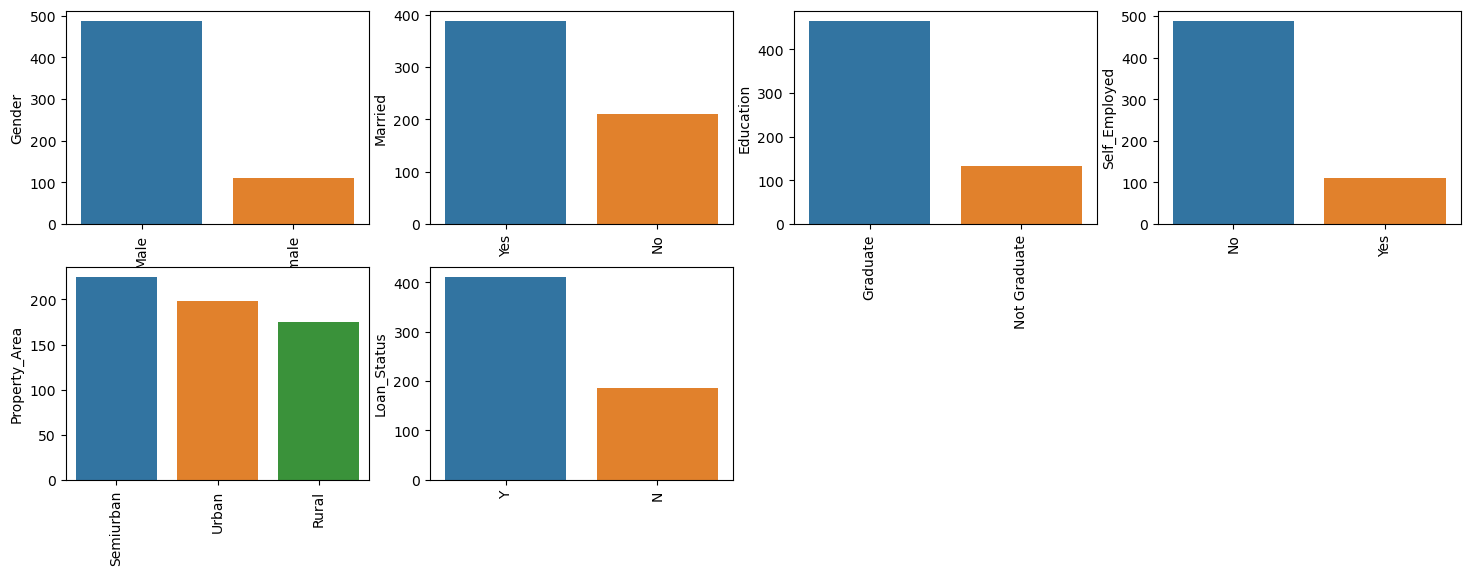

In [6]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize = (18, 36))
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation = 90)
    sns.barplot(x = list(y.index), y = y)
    index += 1

# Using label encoder to transform object datatype into int datatype

In [7]:
label_encoder = preprocessing.LabelEncoder()
obj = (dataset.dtypes == 'object')
for col in list(obj[obj].index):
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int32  
 1   Married            598 non-null    int32  
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    int32  
 4   Self_Employed      598 non-null    int32  
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    int32  
 11  Loan_Status        598 non-null    int32  
dtypes: float64(5), int32(6), int64(1)
memory usage: 42.2 KB


# Seeing the correlation between loan amount and applicant income

<Axes: >

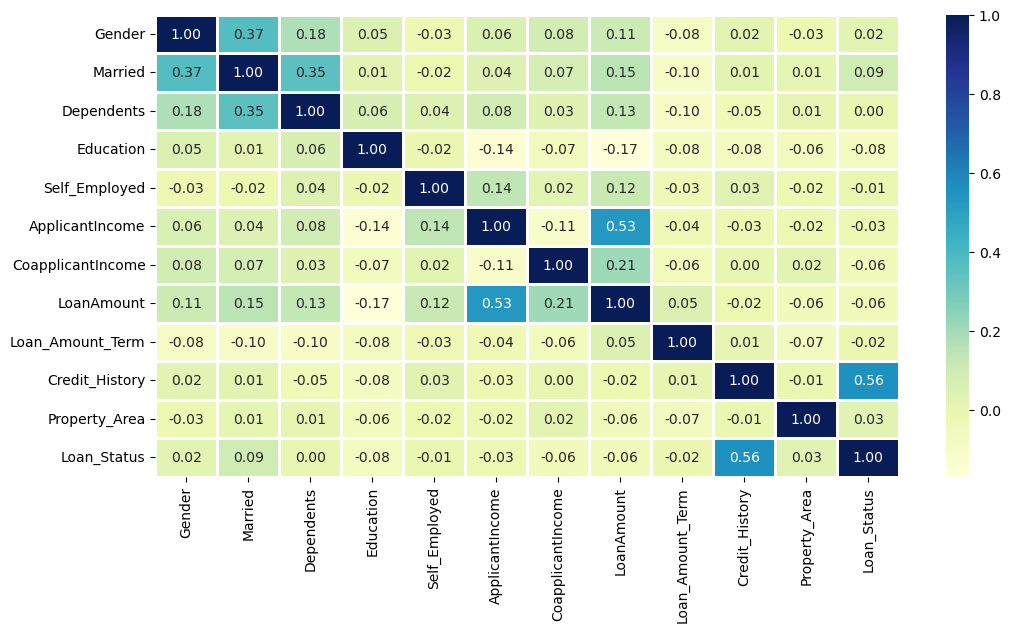

In [9]:
plt.figure(figsize = (12, 6))
sns.heatmap(dataset.corr(), cmap = 'YlGnBu', fmt = '.2f', linewidths = 2, annot = True)

# Using Catplot to see the marital status of applicants

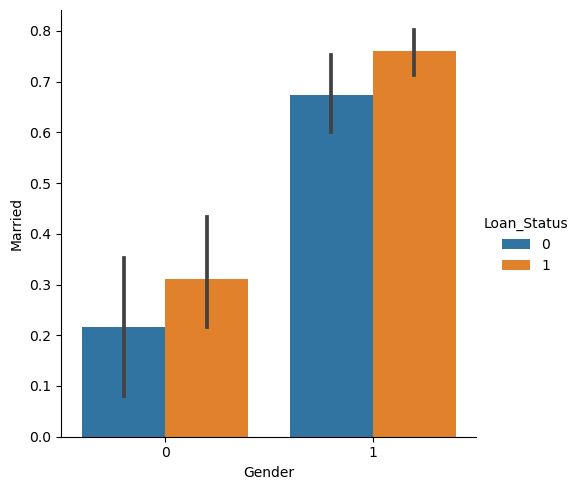

In [10]:
sns.catplot(x = "Gender", y = "Married", hue = "Loan_Status", kind = "bar", data = dataset)

# Replacing the NaN values with mean

In [20]:
for col in dataset.columns: 
  dataset[col] = dataset[col].fillna(dataset[col].mean())  
    
dataset.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Model Training

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 

In [22]:
Y = dataset['Loan_Status']
X = dataset.drop(['Loan_Status'], axis = 1)
X.shape, Y.shape



((598, 11), (598,))

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [24]:
knn = KNeighborsClassifier(n_neighbors = 3)
rfc = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state = 7)
svc = SVC() 
lc = LogisticRegression()

for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_train) 
    print("Accuracy score of ", clf.__class__.__name__, "=", 100*metrics.accuracy_score(Y_train, Y_pred))

Accuracy score of  RandomForestClassifier = 98.04469273743017
Accuracy score of  KNeighborsClassifier = 78.49162011173185
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 80.44692737430168


# Making the predictions on the dataset

In [25]:
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_test) 
    print("Accuracy score of ", clf.__class__.__name__,"=", 100*metrics.accuracy_score(Y_test, Y_pred))

Accuracy score of  RandomForestClassifier = 82.5
Accuracy score of  KNeighborsClassifier = 63.74999999999999
Accuracy score of  SVC = 69.16666666666667
Accuracy score of  LogisticRegression = 80.83333333333333
